# TODO:
Apresentação da proposta de análise de MTG.

## Importando os dados

Para manter esse ambiente mais limpo, e agilizar alguns códigos repetitivos, algumas funções foram definidas no módulo `datasets`, cujo código pode ser encontrado neste projeto.

Caso se interesse em executar esse projeto, siga as instruções contidas no [README](README.md) do projeto.

Utilizaremos a base de dados de cartas de Magic The Gathering, disponibilizada através da API do site [Scryfall](https://scryfall.com/). A base pode ser encontrada no link: [Scryfall Default Cards Dataset](https://data.scryfall.io/default-cards/default-cards-20240216220537.json)

In [1]:
import pandas as pd
import datasets.get_dataset as gd

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
file_path = gd.get_file_path()

mtg_dataset = pd.read_json(file_path)

print(mtg_dataset.shape)
(mtg_dataset.head())

(92217, 85)


,object,id,oracle_id,multiverse_ids,mtgo_id,mtgo_foil_id,tcgplayer_id,cardmarket_id,name,lang,...,tcgplayer_etched_id,flavor_name,attraction_lights,color_indicator,printed_type_line,printed_text,variation_of,life_modifier,hand_modifier,content_warning
0,card,0000579f-7b35-4ed3-b44c-db2a538066fe,44623693-51d6-49ad-8cd7-140505caf02f,[109722],25527.0,25528.0,14240.0,13850.0,Fury Sliver,en,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,card,00006596-1166-4a79-8443-ca9f82e6db4e,8ae3562f-28b7-4462-96ed-be0cf7052ccc,[189637],34586.0,34587.0,33347.0,21851.0,Kor Outfitter,en,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,card,0000a54c-a511-4925-92dc-01b937f9afad,dc4e2134-f0c2-49aa-9ea3-ebf83af1445c,[],NaN,NaN,98659.0,NaN,Spirit,en,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,card,0000cd57-91fe-411f-b798-646e965eec37,9f0d82ae-38bf-45d8-8cda-982b6ead1d72,[435231],65170.0,65171.0,145764.0,301766.0,Siren Lookout,en,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,card,00012bd8-ed68-4978-a22d-f450c8a6e048,5aa12aff-db3c-4be5-822b-3afdf536b33e,[1278],NaN,NaN,1623.0,5664.0,Web,en,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
mtg_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 92217 entries, 0 to 92216
Data columns (total 85 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   object               92217 non-null  object        
 1   id                   92217 non-null  object        
 2   oracle_id            92174 non-null  object        
 3   multiverse_ids       92217 non-null  object        
 4   mtgo_id              45944 non-null  float64       
 5   mtgo_foil_id         24632 non-null  float64       
 6   tcgplayer_id         79110 non-null  float64       
 7   cardmarket_id        68881 non-null  float64       
 8   name                 92217 non-null  object        
 9   lang                 92217 non-null  object        
 10  released_at          92217 non-null  datetime64[ns]
 11  uri                  92217 non-null  object        
 12  scryfall_uri         92217 non-null  object        
 13  layout               92217 non-null 

In [4]:
mtg_dataset[['name', 'mana_cost', 'power', 'toughness', 'color_identity']].iloc[0]

name              Fury Sliver
mana_cost              {5}{R}
power                       3
toughness                   3
color_identity            [R]
Name: 0, dtype: object

# Lidando com dados tratados.
É possível ver que são diversos valores no dataset bruto.
Usando algumas das funções que já aplicam tratamentos, temos:

In [5]:
mtg = gd.cleaned_dataset()

(mtg.head())

,name,mana_cost,cmc,colors,color_identity,keywords,power,toughness,type_line,edhrec_rank,produced_mana,loyalty,life_modifier,hand_modifier
0,Fury Sliver,{5}{R},6.0,[R],R,,3,3,Creature — Sliver,69110,NaN,NaN,NaN,NaN
1,Kor Outfitter,{W}{W},2.0,[W],W,,2,2,Creature — Kor Soldier,164250,NaN,NaN,NaN,NaN
3,Siren Lookout,{2}{U},3.0,[U],U,FlyingExplore,1,2,Creature — Siren Pirate,142670,NaN,NaN,NaN,NaN
6,Obyra's Attendants // Desperate Parry,{4}{U} // {1}{U},5.0,[U],U,Flying,3,4,Creature — Faerie Wizard // Instant — Adventure,165520,NaN,NaN,NaN,NaN
7,Venerable Knight,{W},1.0,[W],W,,2,1,Creature — Human Knight,145890,NaN,NaN,NaN,NaN


In [6]:
mtg.info()

<class 'pandas.core.frame.DataFrame'>
Index: 39579 entries, 0 to 92215
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   name            39579 non-null  object 
 1   mana_cost       39579 non-null  object 
 2   cmc             39579 non-null  float64
 3   colors          39579 non-null  object 
 4   color_identity  39579 non-null  object 
 5   keywords        39579 non-null  object 
 6   power           39579 non-null  int32  
 7   toughness       39579 non-null  int32  
 8   type_line       39579 non-null  object 
 9   edhrec_rank     39579 non-null  int32  
 10  produced_mana   1459 non-null   object 
 11  loyalty         0 non-null      object 
 12  life_modifier   0 non-null      float64
 13  hand_modifier   0 non-null      float64
dtypes: float64(3), int32(3), object(8)
memory usage: 4.1+ MB


In [7]:
mtg.value_counts('color_identity')

color_identity
G        6648
B        6029
W        5965
R        5925
U        5256
         1962
GW        718
BU        650
GU        647
UW        645
BR        644
GR        593
RW        577
BG        516
RU        511
BW        490
BRU       230
BGRUW     227
GRW       205
GUW       182
BUW       182
BGR       160
BRW       125
BGU       116
RUW       113
GRU       106
BGW        98
BGUW       20
GRUW       19
BGRU        7
BRUW        7
BGRW        6
Name: count, dtype: int64

In [11]:
# Pelo visto, o valor que representa as cartas incolores é mostrado apenas como "". Vamos resolver isso.

mtg['color_identity'] = mtg['color_identity'].replace("", "Incolor")

mtg.value_counts('color_identity')

color_identity
G          6648
B          6029
W          5965
R          5925
U          5256
Incolor    1962
GW          718
BU          650
GU          647
UW          645
BR          644
GR          593
RW          577
BG          516
RU          511
BW          490
BRU         230
BGRUW       227
GRW         205
GUW         182
BUW         182
BGR         160
BRW         125
BGU         116
RUW         113
GRU         106
BGW          98
BGUW         20
GRUW         19
BRUW          7
BGRU          7
BGRW          6
Name: count, dtype: int64

## Começando com algumas perguntas simples de serem respondidas

__1__ - Quais as cores mais comuns no jogo?
Na representação de cores no magic, é comum se referir a cada cor por apenas uma letra. Sendo assim, temos:
- __B__: Black (_Preto_)
- __G__: Green (_Verde_)
- __R__: Red (_Vermelho_)
- __W__: White (_Branco_)
- __U__: Blue (_Azul_)

Além disso, existem também no jogo algumas cartas incolores.

In [20]:
mtg_colors = mtg.groupby('color_identity').size().reset_index(name='count')

total_count = mtg_colors['count'].sum()
mtg_colors['percentage'] = (mtg_colors['count'] / total_count) * 100

(mtg_colors.sort_values('count', ascending=False))

,color_identity,count,percentage
16,G,6648,16.796786
0,B,6029,15.232825
31,W,5965,15.071124
25,R,5925,14.970060
29,U,5256,13.279770
24,Incolor,1962,4.957174
23,GW,718,1.814093
13,BU,650,1.642285
21,GU,647,1.634705
30,UW,645,1.629652


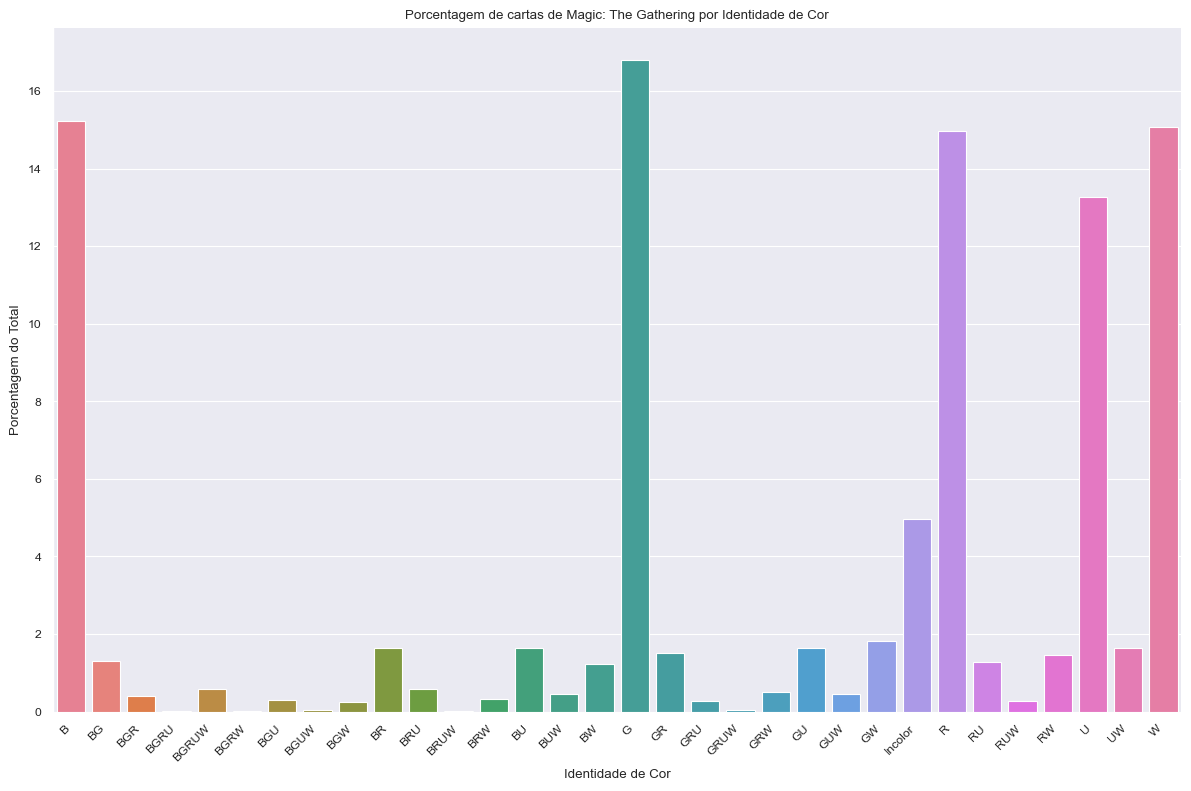

In [13]:
# Quais as cores de cartas mais comuns no jogo?
plt.figure(figsize= (12, 8))

sns.set_theme(style='darkgrid', context='paper')

bars = sns.barplot(
  data=mtg_colors,
  x='color_identity',
  y='percentage',
  hue='color_identity',
  legend=False,
)

sns.despine(bottom=True)

plt.xticks(rotation=45, ha='right')
plt.xlabel('Identidade de Cor')
plt.ylabel("Porcentagem do Total")
plt.title("Porcentagem de cartas de Magic: The Gathering por Identidade de Cor")
plt.tight_layout()

plt.show()

### Agrupando Multicoloridas
As cartas multicoloridas ainda representam, individualmente (por combinação) uma parcela pequena, quando comparadas com as 5 cores (+ Incolores). Por isso, vamos agrupar esses valores em uma categoria "Multicor".
Aproveitando, vamos substituir os valores por `labels` mais amigáveis.

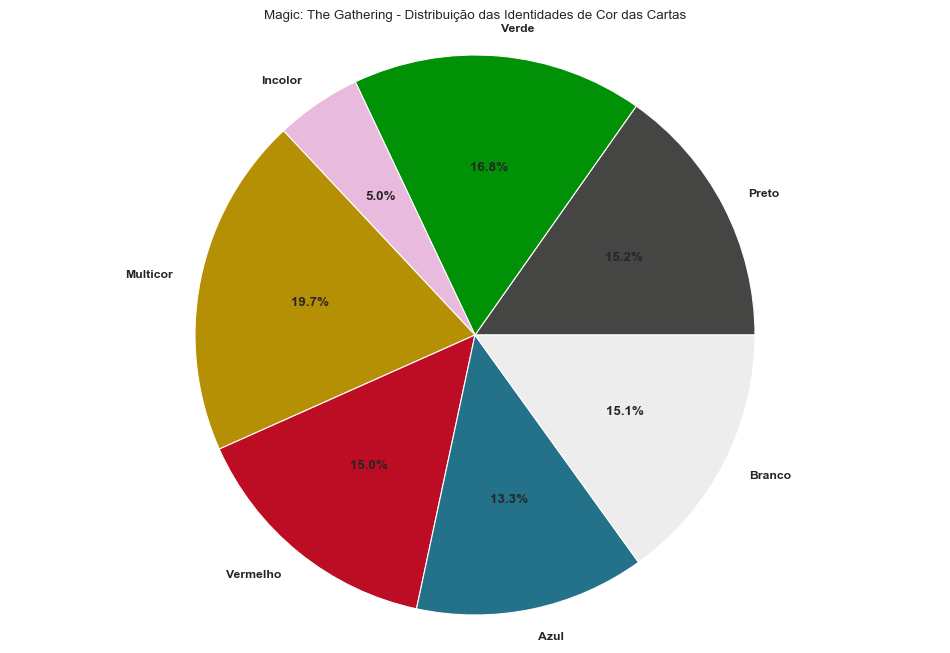

In [39]:
# Agrupando valores menores que 2%
limite = 2

mtg_colors['color_identity'] = mtg_colors.apply(lambda row: row['color_identity'] if row['percentage'] >= limite else 'Multicor', axis = 1)
mtg_multicolor = mtg_colors.groupby('color_identity').sum().reset_index()
mtg_multicolor['color_identity'] = mtg_multicolor['color_identity'].replace("G", "Verde")
mtg_multicolor['color_identity'] = mtg_multicolor['color_identity'].replace("B", "Preto")
mtg_multicolor['color_identity'] = mtg_multicolor['color_identity'].replace("W", "Branco")
mtg_multicolor['color_identity'] = mtg_multicolor['color_identity'].replace("U", "Azul")
mtg_multicolor['color_identity'] = mtg_multicolor['color_identity'].replace("R", "Vermelho")

colors = {
  "Verde": "#019106",
  "Preto": "#454544",
  "Branco": "#ededed",
  "Azul": "#24728a",
  "Vermelho": "#bd0d25",
  "Multicor": "#b58f04",
  "Incolor": "#e8badd",
}
plt.figure(figsize= (12, 8))

plt.pie(
  mtg_multicolor['percentage'],
  labels=mtg_multicolor['color_identity'],
  autopct='%1.1f%%',
  colors=[colors[label] for label in mtg_multicolor['color_identity']],
  textprops={'fontweight': 'bold'},
)
plt.axis('equal')
plt.title("Magic: The Gathering - Distribuição das Identidades de Cor das Cartas")

plt.show()

## Distribuições de CMC por Cor